*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-0402leastsquares/'
FileBaseName = '1Error-0402leastsquares'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import scipy as sp
import scipy.optimize as opt
print('scipy      Ver.', sp.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
scipy      Ver. 1.12.0
pandas     Ver. 2.2.3
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0402leastsquares/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0402leastsquares/


最確値を書式化して文字列として返す関数

Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

データのグラフを描く関数

In [5]:
############################################
def GrfData( x_data, y_data, x_label='x', y_label='y', y_sets=None ):
  #
  plt.rcParams['font.size'] = 24
  #
  fig = plt.figure( figsize=(12.5,8) )
  #
  fig.subplots_adjust(left=0.13, right=0.60, top=0.95, bottom=0.12)
  #
  ax1 = fig.add_subplot(1,1,1)
  ax1.set_xlabel( x_label )
  ax1.set_ylabel( y_label )
  #
  ax1.plot( x_data, y_data, color='black', label='Data', linewidth=2.0, linestyle='solid' )
  #
  if y_sets is not None:
    for y_set in y_sets:
      #
      y_set_data   = y_set[ 0 ]
      y_set_label  = y_set[ 1 ]
      y_set_color  = y_set[ 2 ]
      y_set_lstyle = y_set[ 3 ]
      y_set_lwidth = y_set[ 4 ]
      #
      ax1.plot( x_data, y_set_data, color=y_set_color, label=y_set_label, linewidth=y_set_lwidth, linestyle=y_set_lstyle )
    #
  #
  plt.legend( fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0 )
  plt.show()
  #
  return fig


非線形関数:  $y\approx{}g(t;\boldsymbol{\theta}) = a \sin(2\pi{}ft+\phi)$, $\boldsymbol{\theta}=\{a, f, \phi\}$

測定データを模倣した人工データ
* $y_{i} = g(t_{i};\boldsymbol{\theta})+{\cal{}N}(0,\sigma_{y})$
* $a_{\rm{}true} = 1.0$
* $f_{\rm{}true} = 2.0$ Hz
* $\phi_{\rm{}true} = 0.0$ rad.
* $t_{i}=0.0\sim1.0$ sec
* $\sigma_{y}=0.05$

人工データのグラフを描く

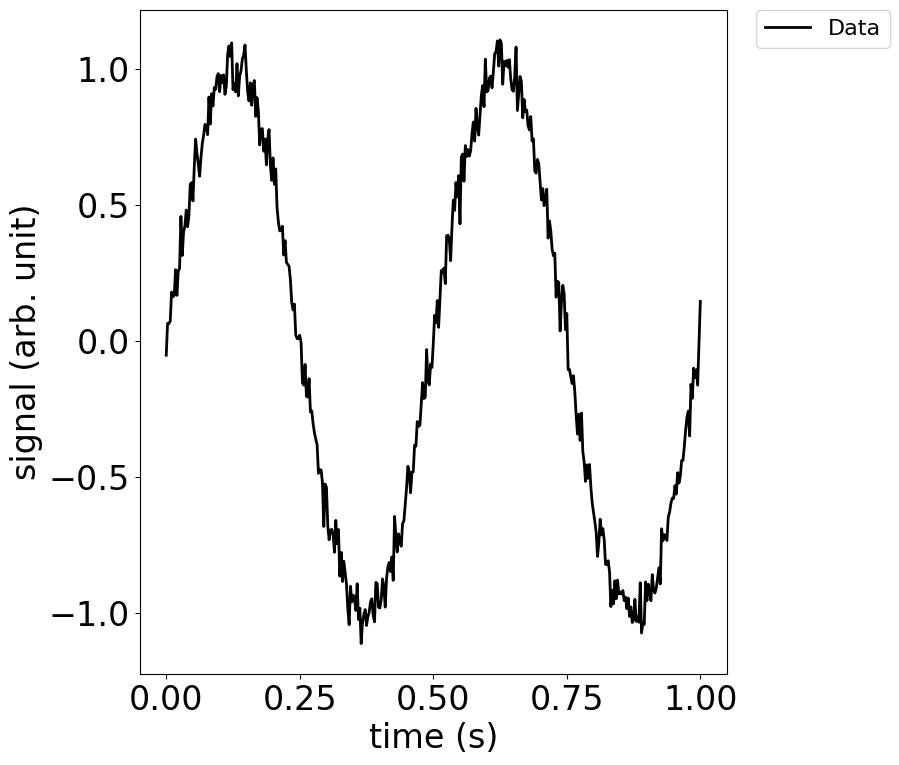

In [6]:
############################################
def g(t, a, f, phi):
  return a * np.sin( 2.0 * np.pi * f * t + phi)
#
############################################
data_n  = 401
sigma_y = 0.05
#
a_true    = 1.0
f_true    = 2.0
phi_true  = 0.0
#
x_data = np.linspace( 0.0, 1.0, num=data_n, endpoint=True)
y_data = g( x_data, a_true, f_true, phi_true ) + np.random.normal(size=data_n, scale=sigma_y)
#
fig = GrfData( x_data, y_data, x_label='time (s)', y_label='signal (arb. unit)' )
#
#
fig.savefig( FilePath + FileBaseName + '-01.pdf' )

scipy.optimize.least squares()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
```
result = scipy.optimize.least_squares( residual, theta0, bounds=(-inf, inf), method='trf' )
```
* residual: 残差を計算する関数
* theta0: 探索初期値
* bounds: 探索範囲の指定
* method:
  * 'trf' : Trust Region Reflective algorithm
  * 'dogbox' : Dogleg algorithm with rectangular trust regions
  * 'lm' : Levenberg-Marquardt algorithm


残差関数:

$${\rm{}Residual}(\boldsymbol{\theta};\boldsymbol{x}, \boldsymbol{y})=\boldsymbol{y}-g(\boldsymbol{x};\boldsymbol{\theta})$$

探索初期値:
$$\boldsymbol{\theta}_{0}=\{a_{0},f_{0},\phi_{0}\}$$

least_squares()を用いた解の探索と、結果のグラフ描画

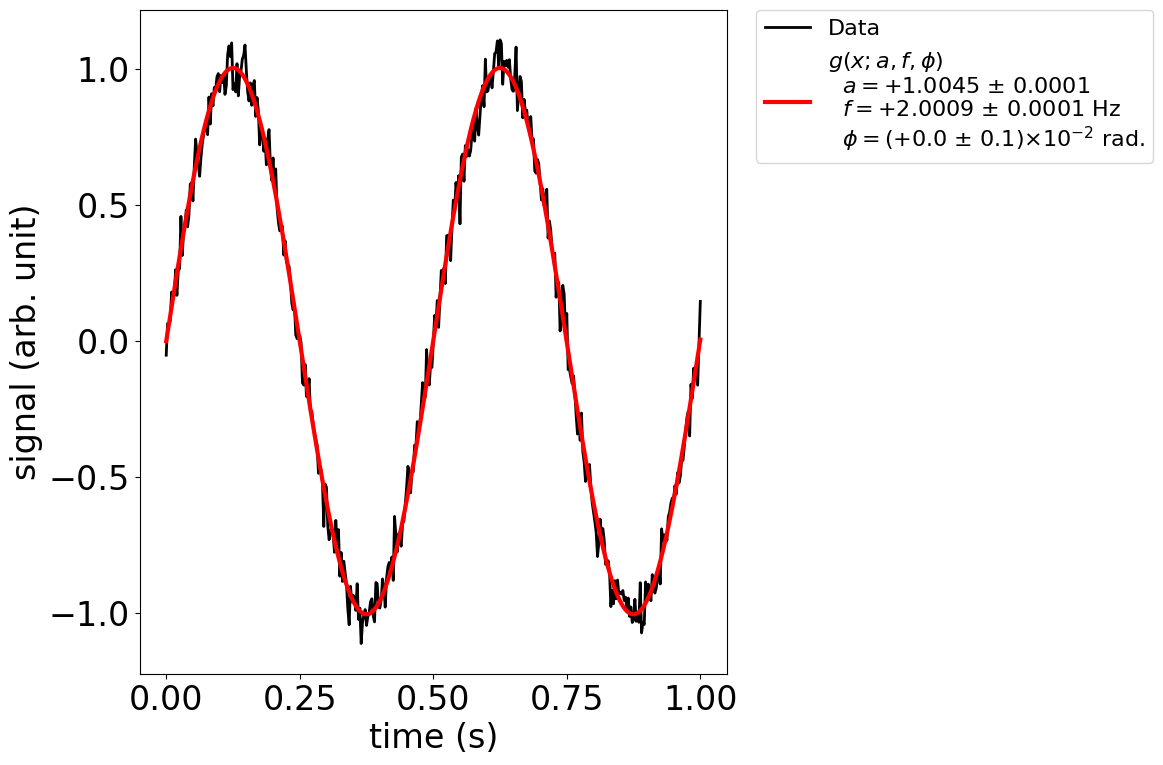

In [7]:
############################################
# 残差関数
def residual(theta, x, y):
  a, f, phi = theta[0], theta[1], theta[2]
  return y - g(x, a, f, phi)
#
############################################
# 探索初期値
a0   = 0.8
f0   = 1.5
phi0 = 0.0
#
theta0 = np.array( [ a0, f0, phi0 ] )
#
############################################
result = opt.least_squares( residual, theta0, method='lm',args=(x_data,y_data) )
a_opt, f_opt, phi_opt = result.x[0], result.x[1], result.x[2]
#
y_opt = g( x_data, a_opt, f_opt, phi_opt )
y_opt_label = r'$g(x;a, f, \phi)$'+ '\n  '\
  + r'$a=$'+ Format_MostProbableValue( a_opt, 0.0001, '', std_2digits=False, latex=True ) + '\n  '\
  + r'$f=$'+ Format_MostProbableValue( f_opt, 0.0001, 'Hz', std_2digits=False, latex=True ) + '\n  '\
  + r'$\phi=$'+ Format_MostProbableValue( phi_opt, 0.001, 'rad.', std_2digits=False, latex=True )
#
y_opt_set = [ [ y_opt, y_opt_label, 'red', 'solid', 3 ] ]
#
fig = GrfData( x_data, y_data, y_sets=y_opt_set, x_label='time (s)', y_label='signal (arb. unit)' )
#
fig.savefig( FilePath + FileBaseName + '-02.pdf' )